In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py as h5
import os
from glob import glob
from pathlib import Path
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl

In [2]:
SNAPSHOTS_PATH = "../output/snapshots"
def get_sets_path(p, m):
    sets_path = os.path.join(SNAPSHOTS_PATH, f"snapshots_p{p}_m{m}".replace(".", "_"))

    assert os.path.exists(sets_path)
    return Path(os.path.abspath(sets_path))

In [3]:
def get_h5_data(filepath, tasks):
    """
    Get the biomass and flux data from an HDF5 file.
    """
    with h5.File(filepath, "r") as f:
        results = [np.array(f["scales"]["sim_time"])] + [np.array(f["tasks"][task]) for task in tasks]
        
    return results


def get_sim_time(data_entry):
    """
    Get the simulation time from a data entry.
    """
    return data_entry[0][0]

def get_all_data(dirpath: Path, tasks=["biomass", "flux", "soil_water", "surface_water"]):
    """
    Get all the data from a directory."""
    filepaths = dirpath.glob("*.h5")
    raw_data = []
    for filepath in filepaths:
        raw_data.append(get_h5_data(filepath, tasks))

    raw_data = sorted(raw_data, key=get_sim_time)

    results = []
    for i in range(len(tasks) + 1): # +1 for sim_time
        results.append(np.concatenate([data[i] for data in raw_data], axis=0))

    return results

# Plot above and below critical point

Text(0, 0.5, 'Average biomass')

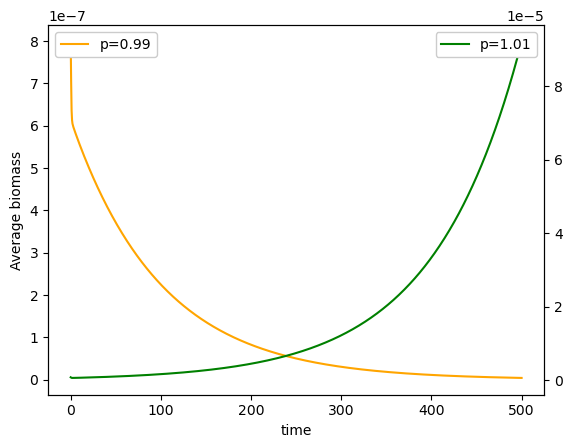

In [4]:
below_sets_path = get_sets_path(0.99, 1.0)
sim_time, biomass, flux = get_all_data(below_sets_path, tasks=["biomass", "flux"])
avg_b1 = biomass.mean(axis=(1, 2))

above_sets_path = get_sets_path(1.01, 1.0)
sim_time, biomass, flux = get_all_data(above_sets_path, tasks=["biomass", "flux"])
avg_b2 = biomass.mean(axis=(1, 2))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(sim_time, avg_b1, label="p=0.99", color="orange")
ax1.legend(framealpha=1, loc="upper left")

ax2 = ax1.twinx()
ax2.plot(sim_time, avg_b2, label="p=1.01", color="green")
ax2.legend(framealpha=1, loc="upper right")

ax1.set_xlabel("time")
ax1.set_ylabel("Average biomass")



# Plot flux-pattern relation

In [17]:
def plot_flux_highlights(p, m, highlights, end=1000):
    fig = plt.figure(tight_layout=True, dpi=600)
    fig.suptitle(f"p={p}, m={m}")

    ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2, fig=fig)
    ax2 = plt.subplot2grid((2, 2), (1, 0), fig=fig)
    ax3 = plt.subplot2grid((2, 2), (1, 1), fig=fig)

    axs = [ax2, ax3]

    below_sets_path = get_sets_path(p, m)
    sim_time, biomass, flux = get_all_data(below_sets_path, tasks=["biomass", "flux"])

    sim_time = sim_time[:end]
    biomass = biomass[:end]
    flux = flux[:end]

    total_flux = np.abs(flux[:, :, 0].sum(axis=1))
    ax1.plot(sim_time, total_flux)
    for idx in highlights:
        ax1.plot(sim_time[idx], total_flux[idx], "o", color="red")
    ax1.set_xlabel("time [yr]")
    ax1.set_ylabel("total flux")

    clim = (0, biomass.max())
    for idx, ax in zip(highlights, axs):
        ax.set_title(f"t={sim_time[idx]:.2f}\n$J_y={total_flux[idx]:.2E}$")
        im = ax.imshow(np.rot90(biomass[idx]), cmap="YlGn", origin="lower", clim=clim)
        fig.colorbar(im, ax=ax)
        ax.set_xticks([])
        ax.set_yticks([])



In [6]:
def plot_avg_value(p, m):
    below_sets_path = get_sets_path(p, m)
    sim_time, biomass, flux, soil_water, surface_water = get_all_data(below_sets_path, tasks=["biomass", "flux", "soil_water", "surface_water"])
    avg_biomass = biomass.mean(axis=(1, 2))
    avg_flux = np.abs(flux[:, :, 0].sum(axis=1))
    avg_soil_water = soil_water.mean(axis=(1, 2))
    avg_surface_water = surface_water.mean(axis=(1, 2))

    fig = plt.figure()
    plt.plot(sim_time, avg_biomass, label="biomass")
    plt.plot(sim_time, avg_soil_water, label="soil water")
    plt.plot(sim_time, avg_flux, label="flux")
    plt.plot(sim_time, avg_surface_water, label="surface water")

    plt.legend(framealpha=1, loc="upper left")

IndexError: index 200 is out of bounds for axis 0 with size 114

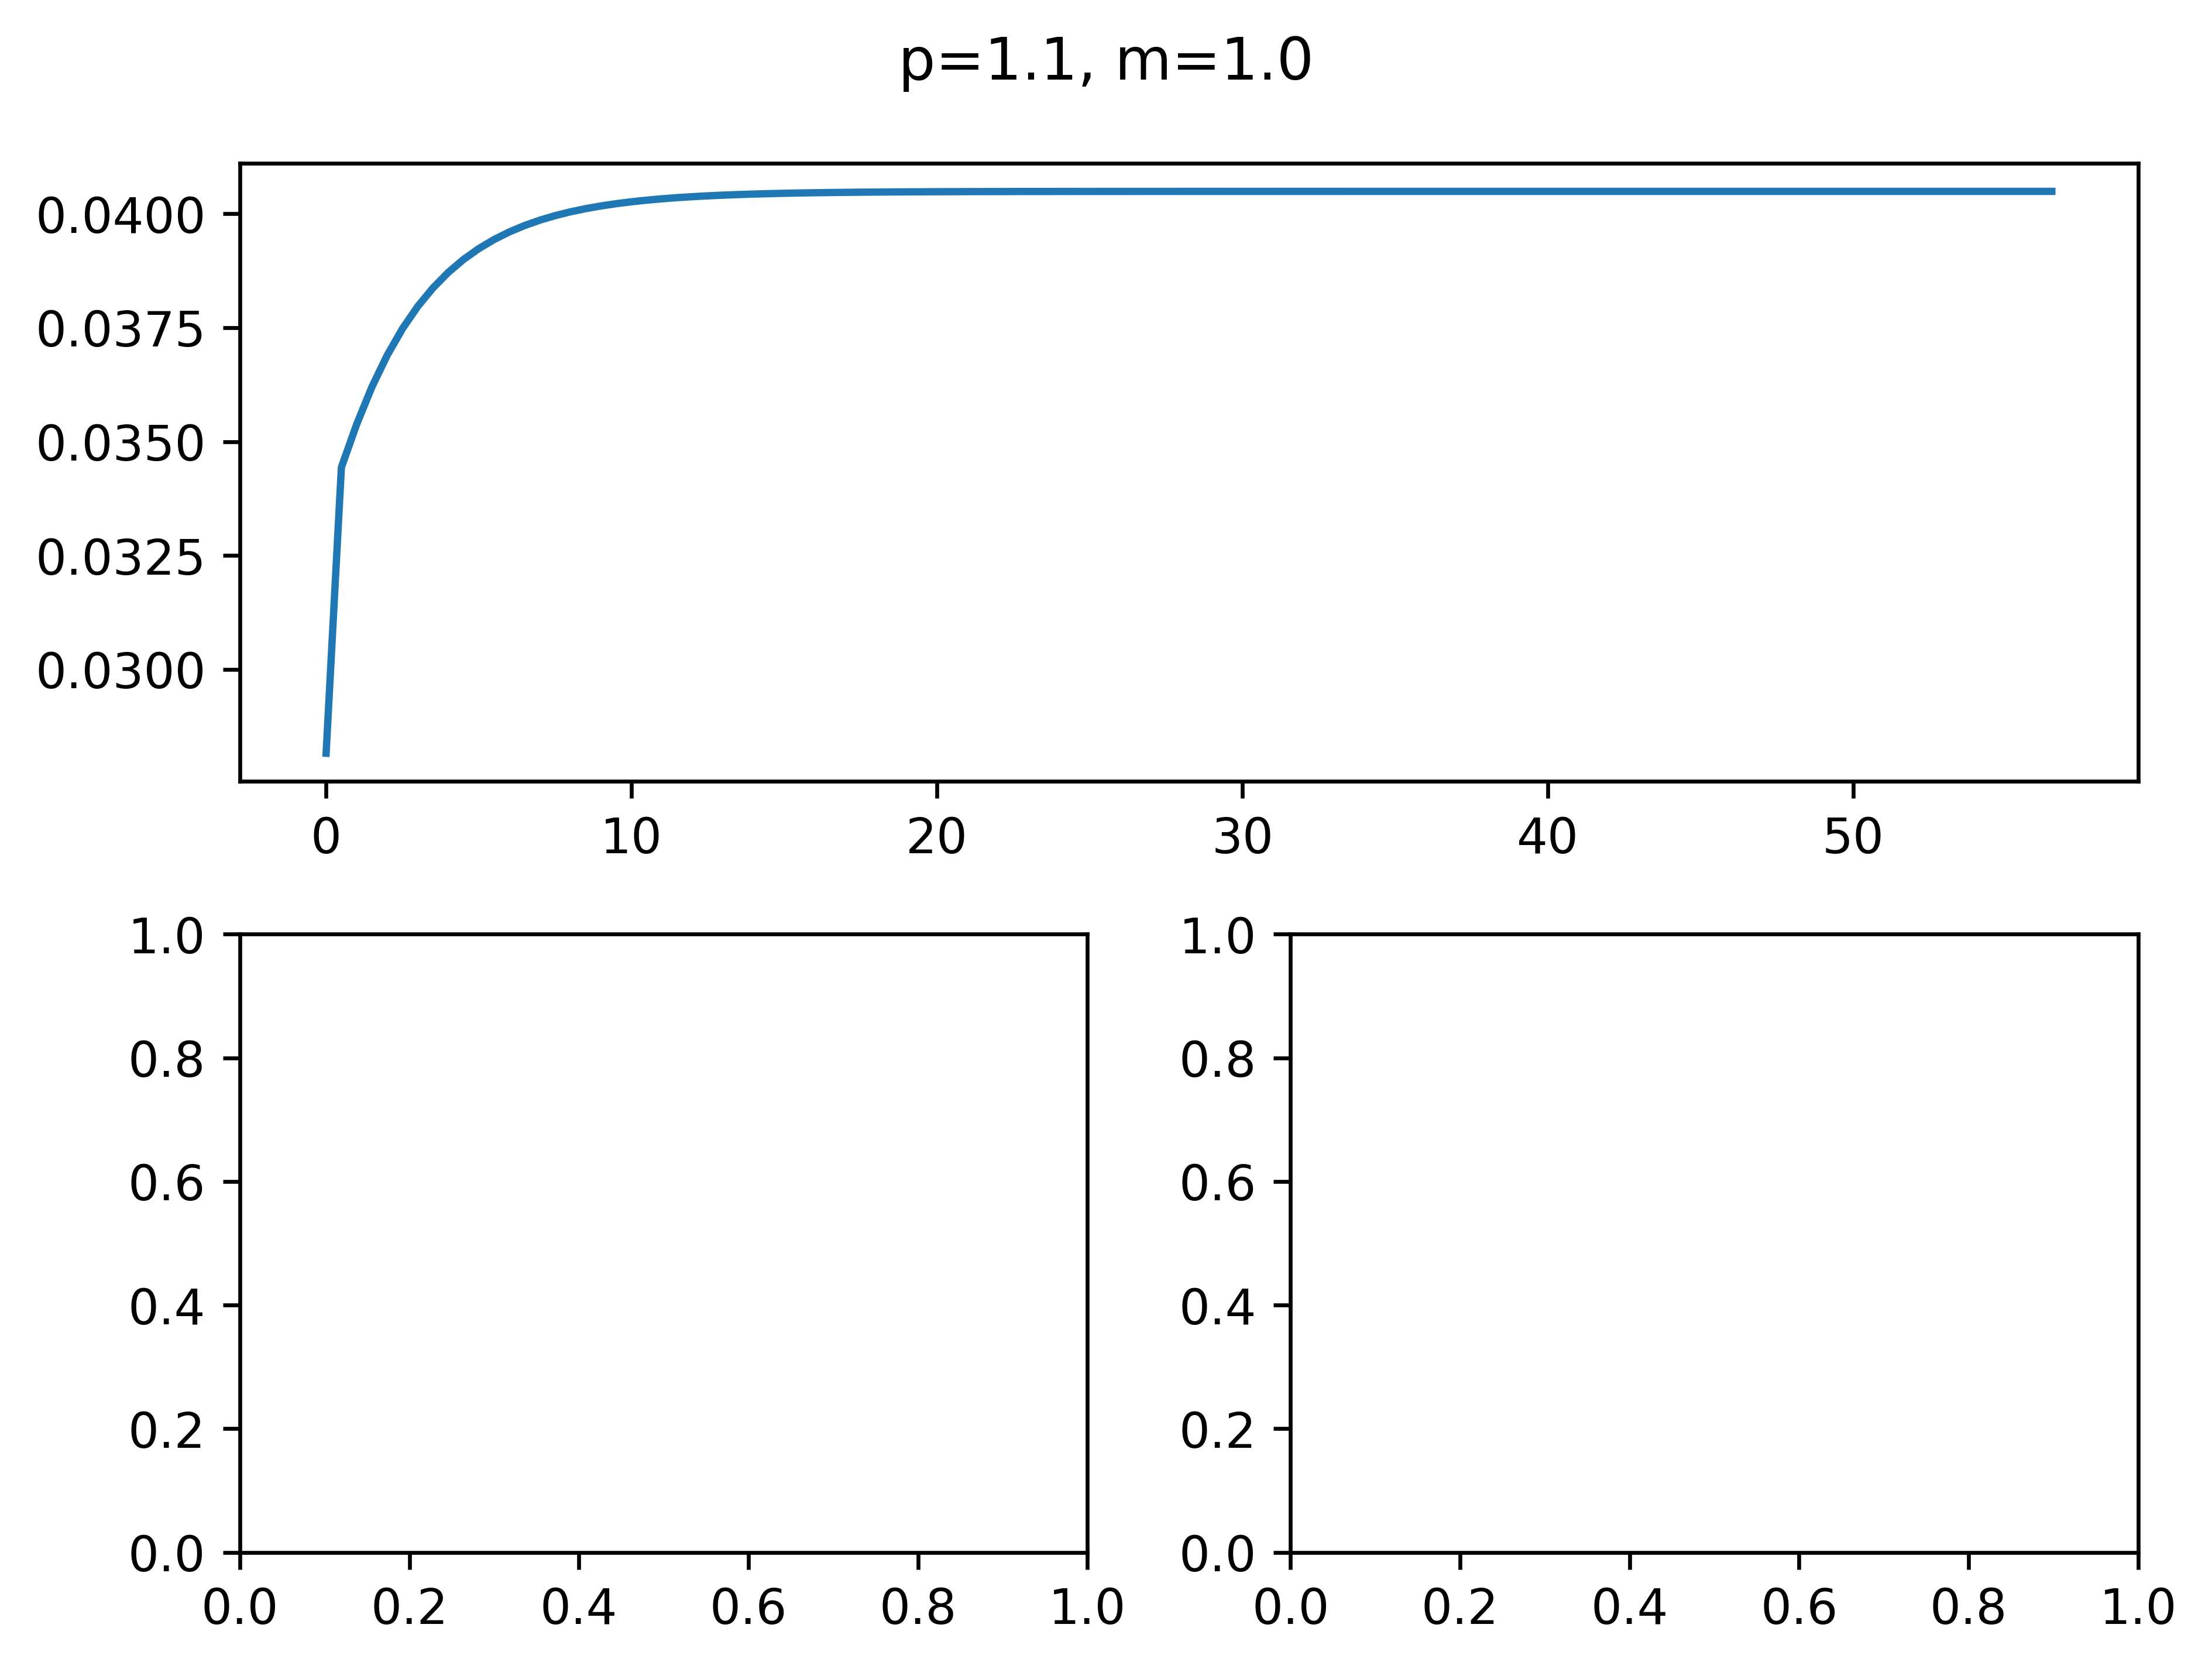

In [15]:
plot_flux_highlights(1.1, 1.0, [200, 800])

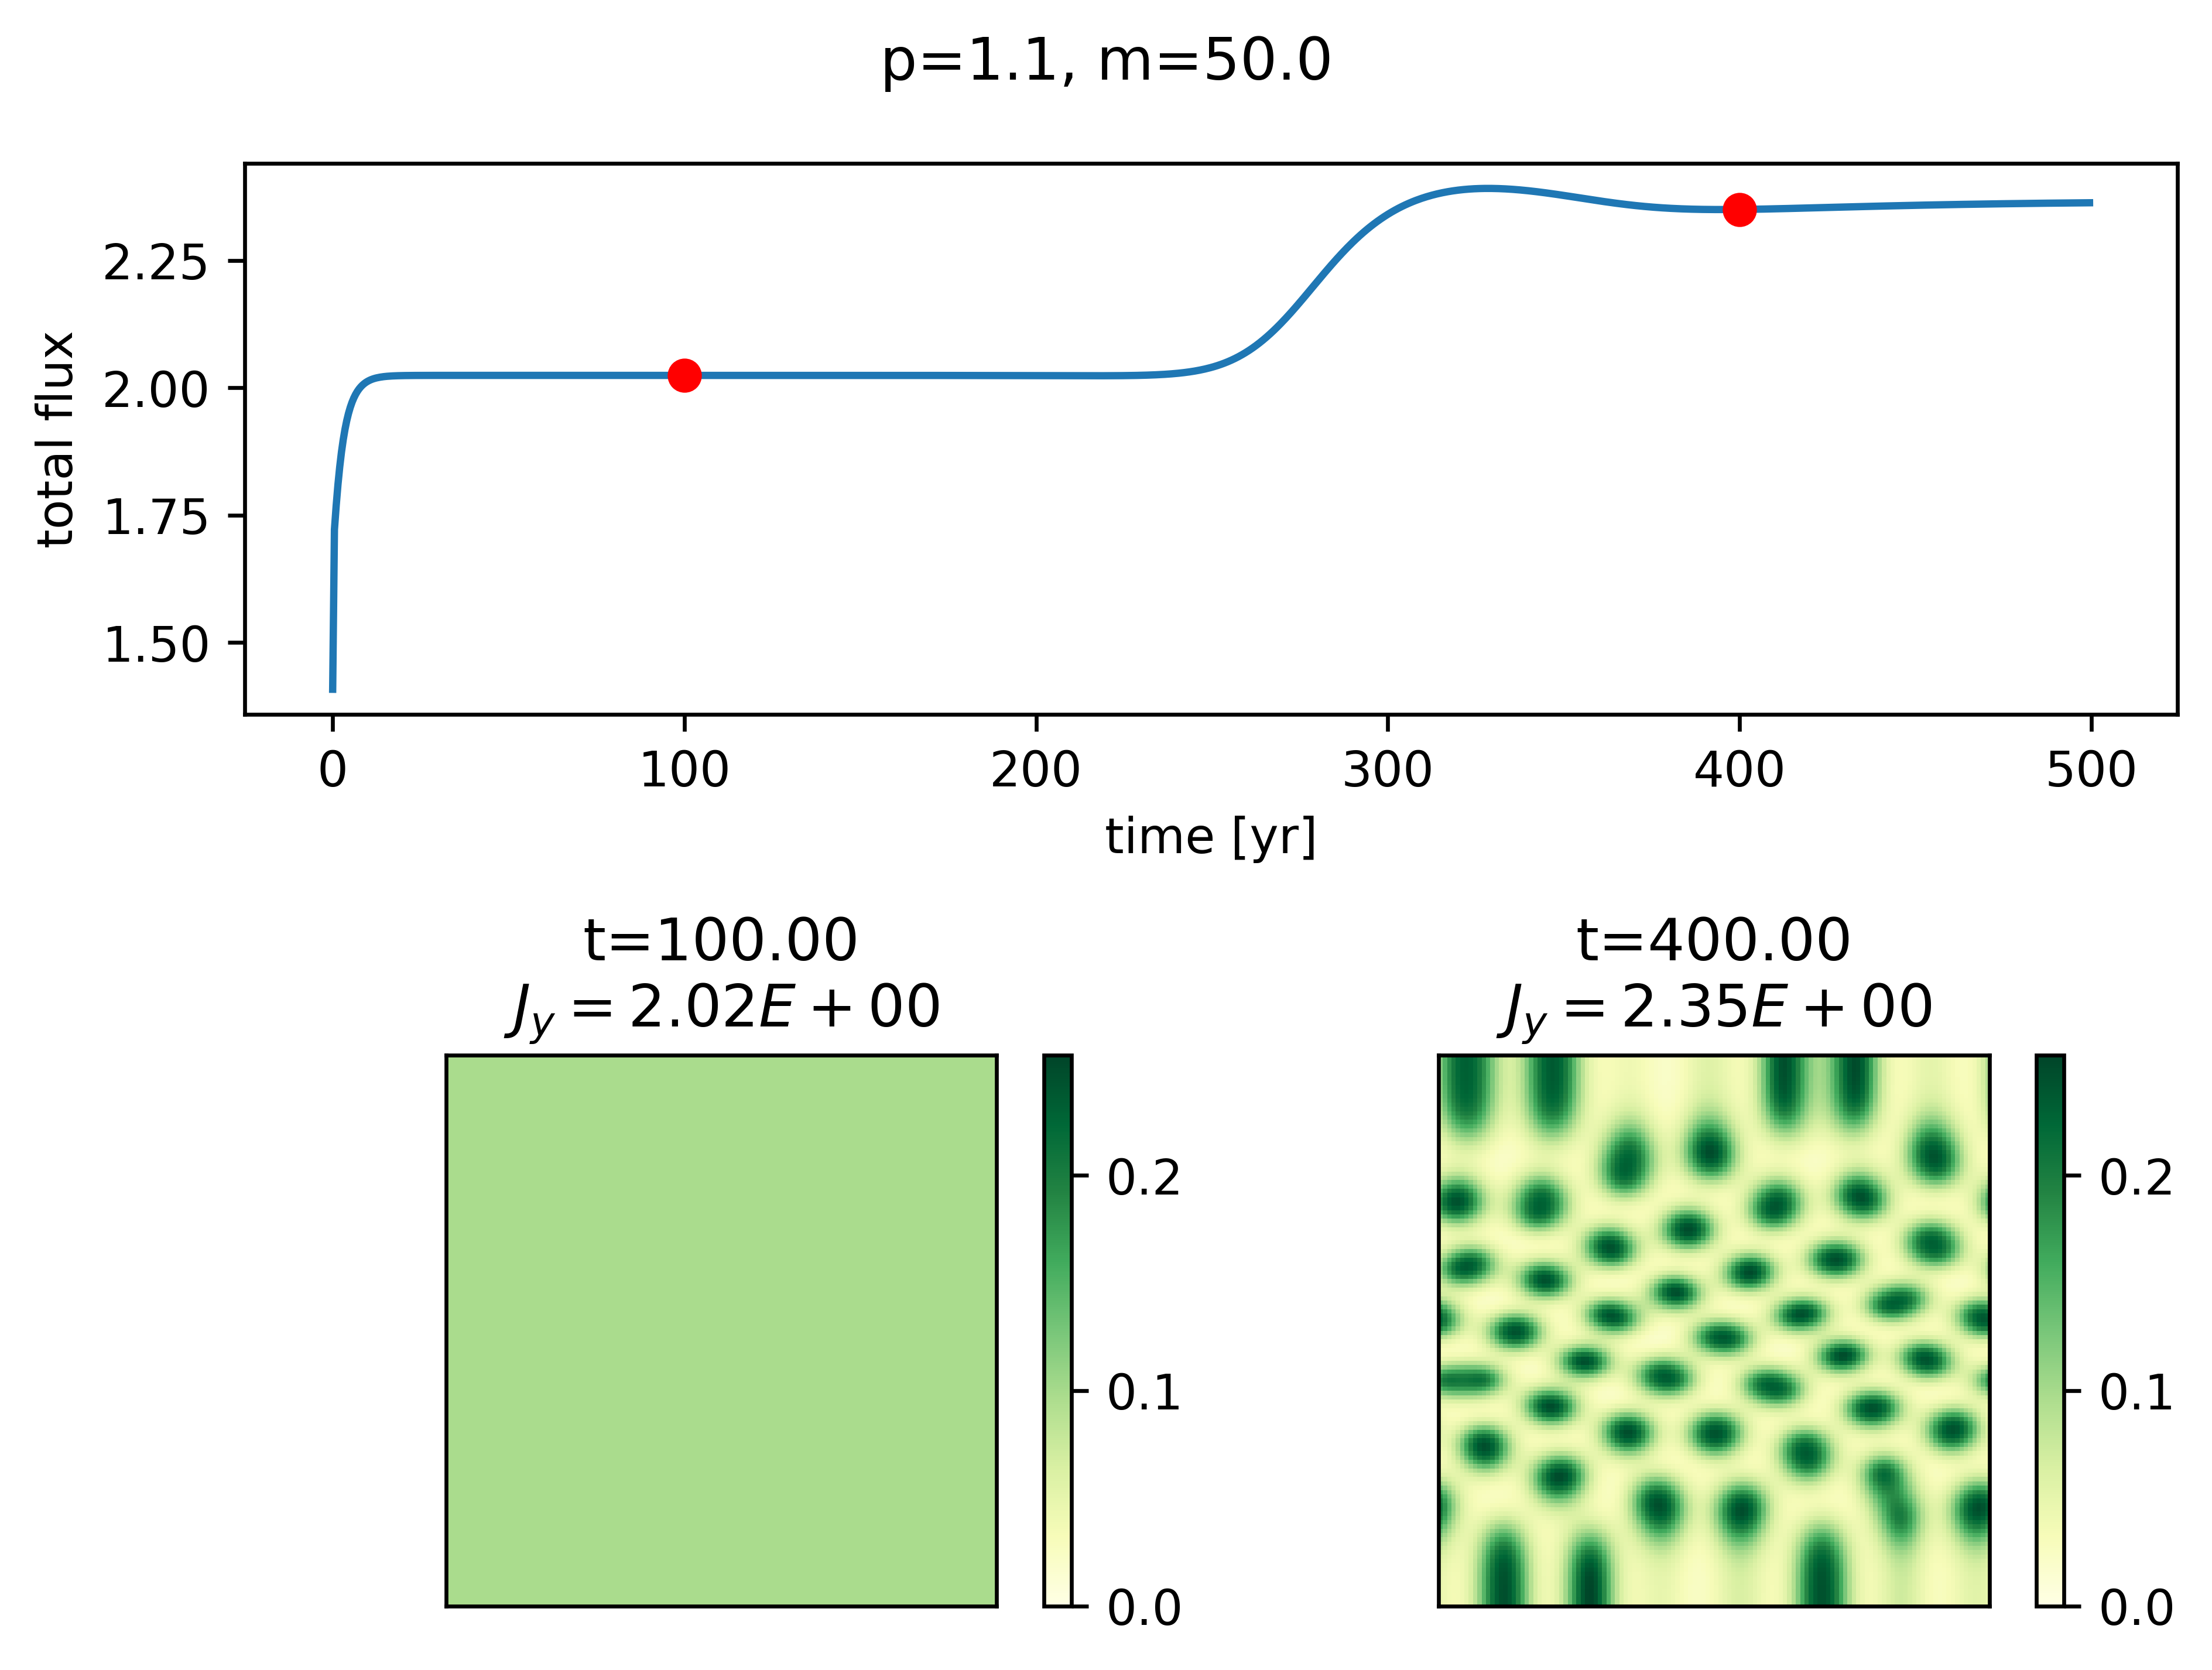

In [18]:
plot_flux_highlights(1.1, 50.0, [200, 800])

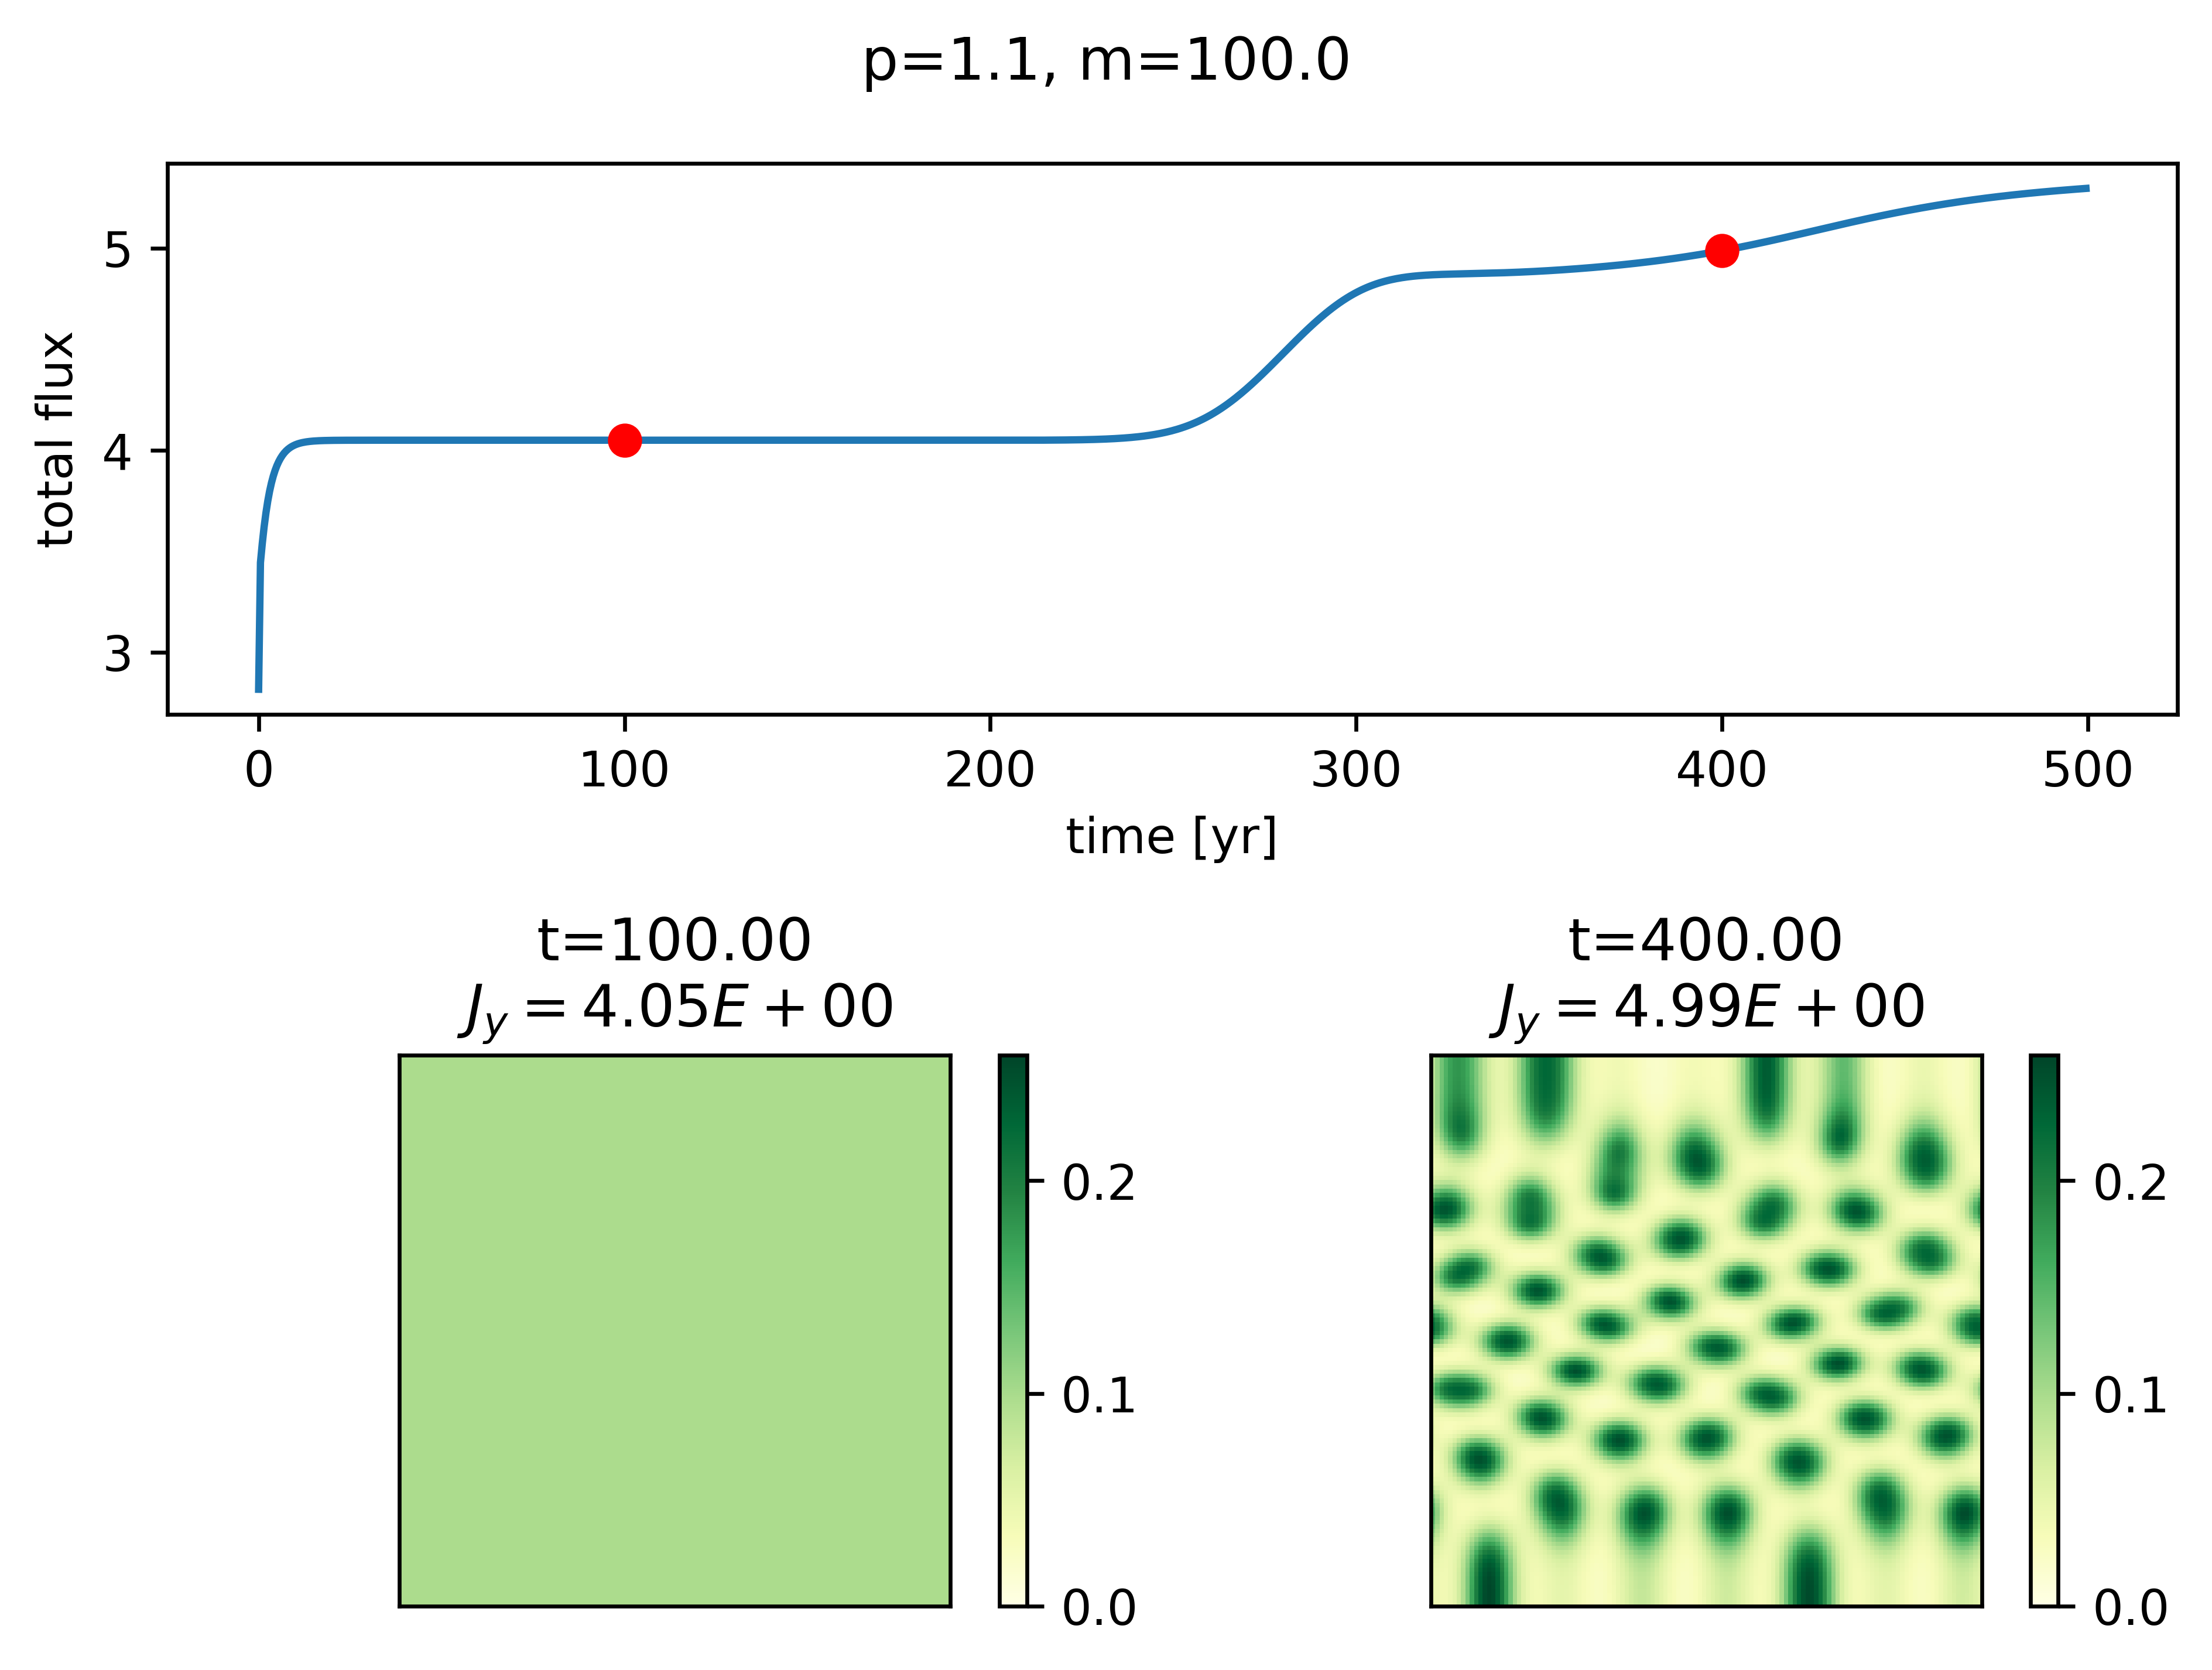

In [19]:
plot_flux_highlights(1.1, 100.0, [200, 800])

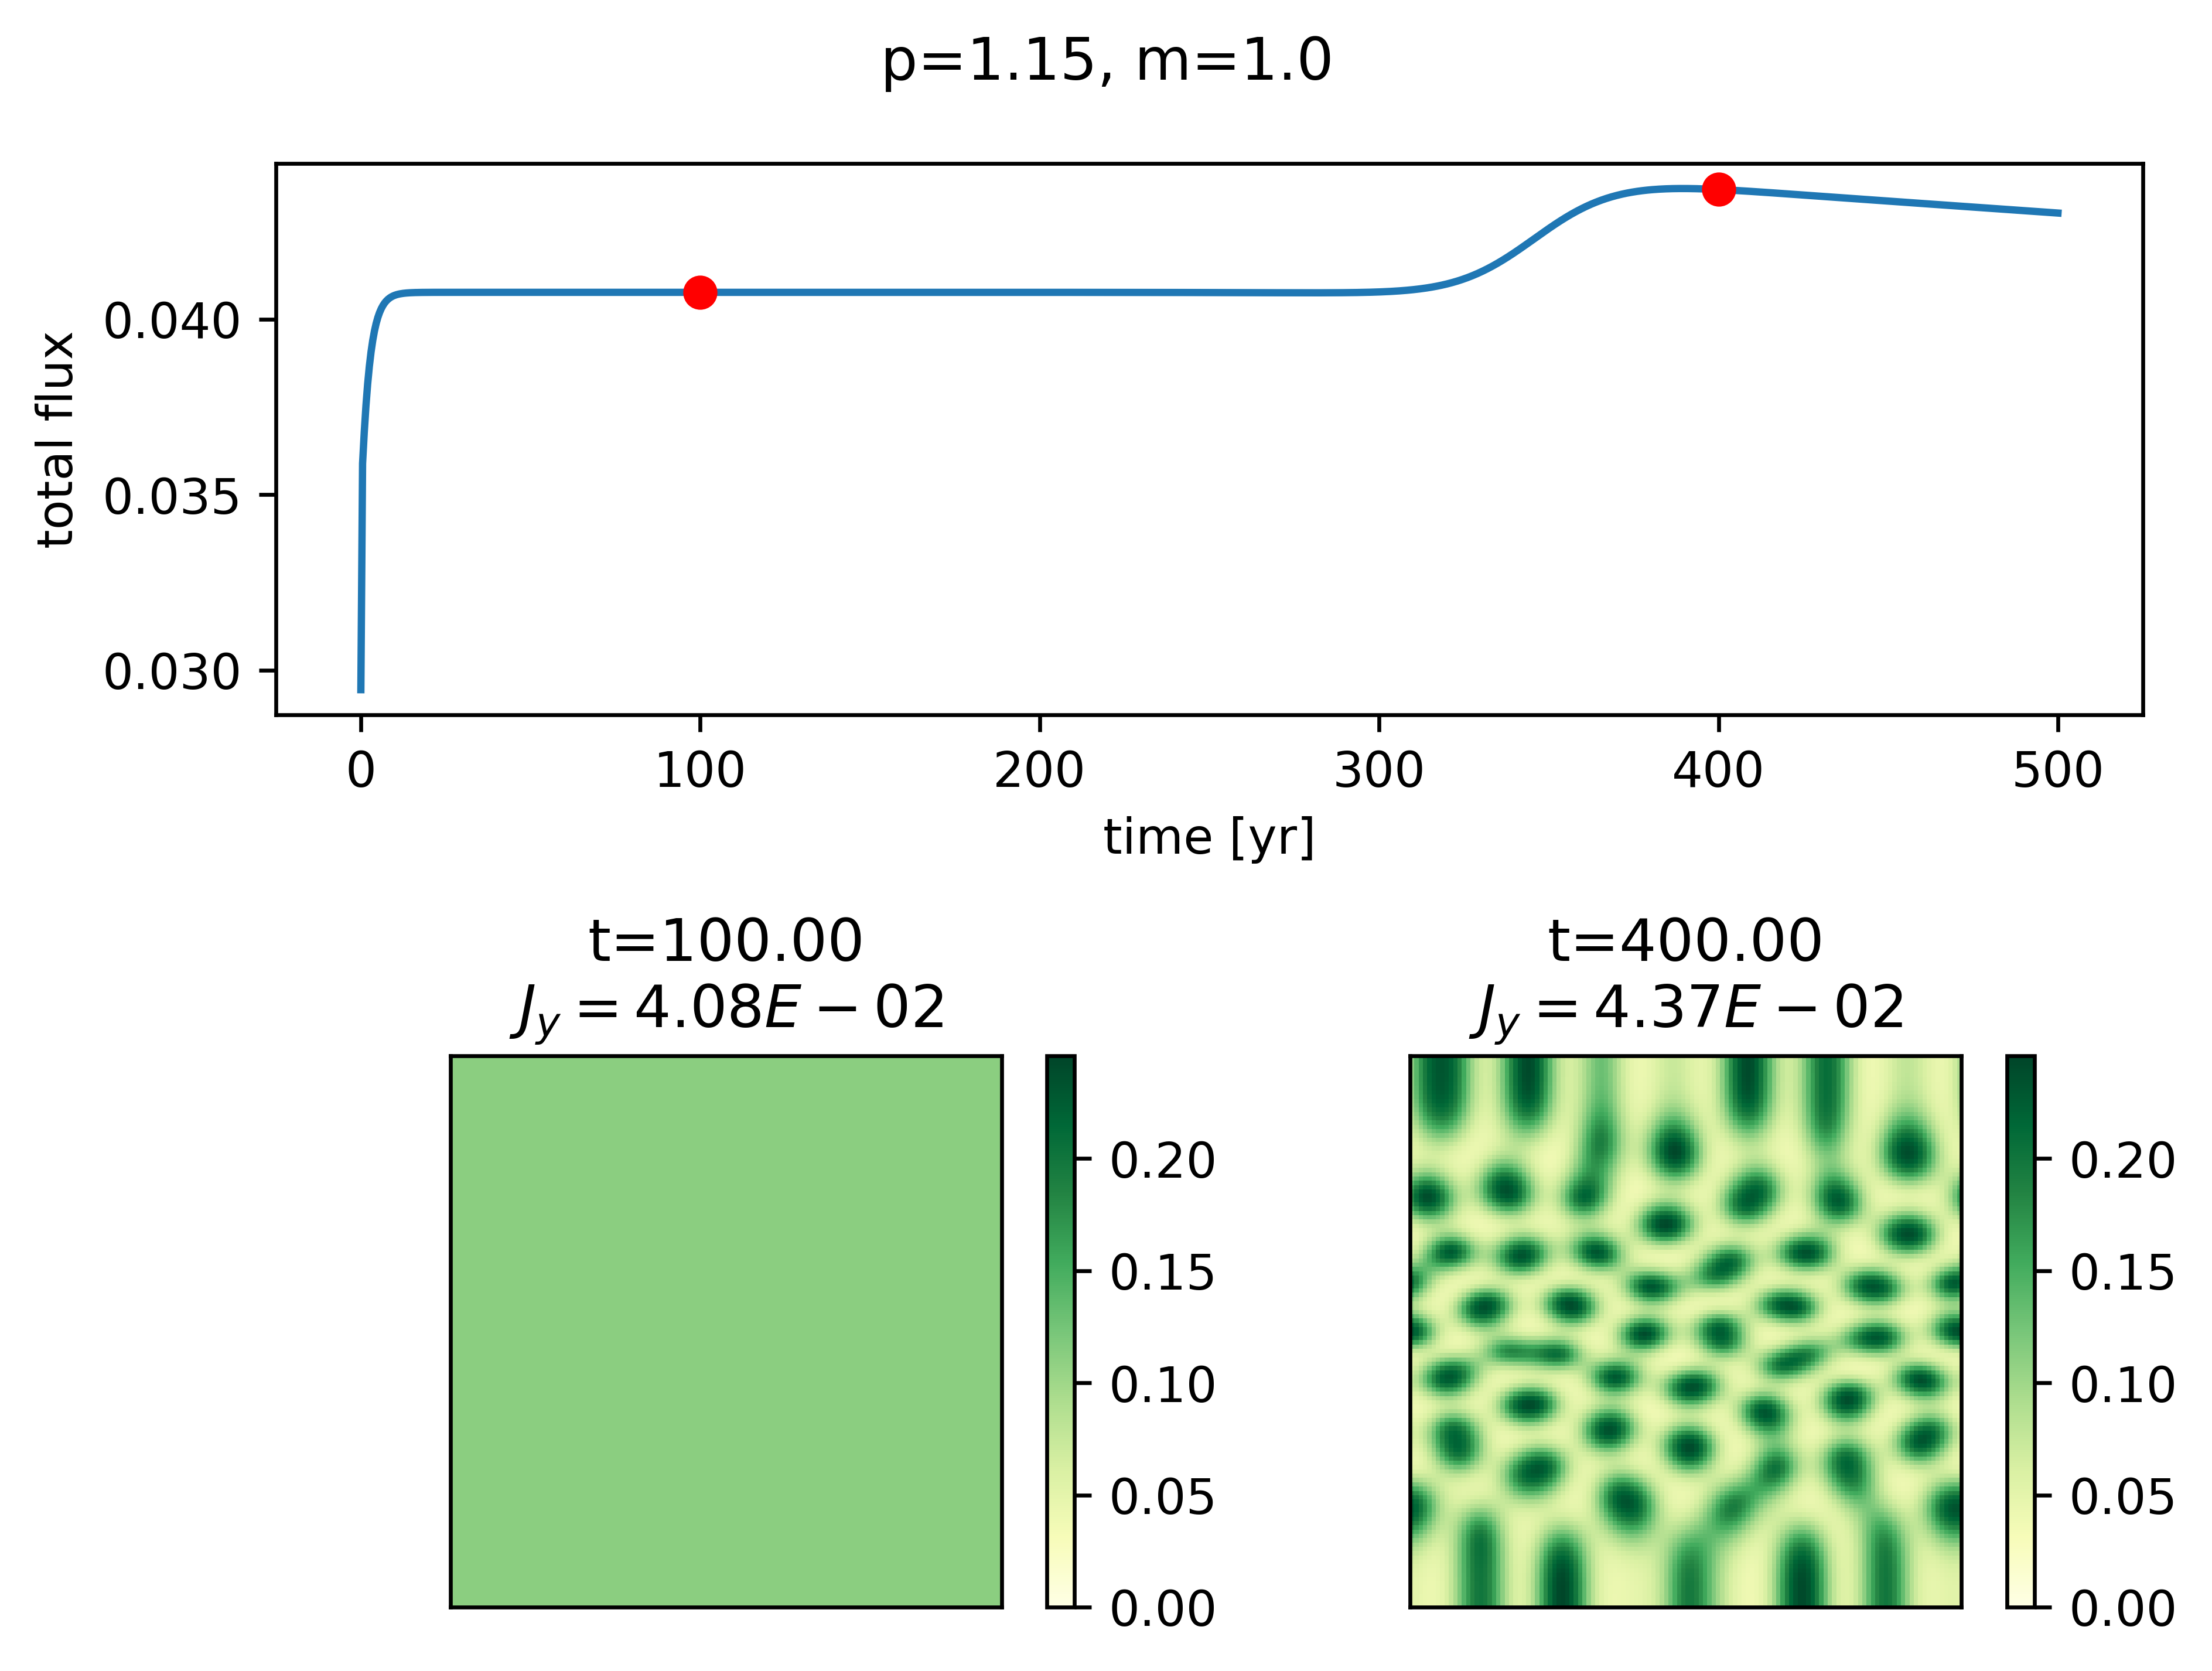

In [ ]:
plot_flux_highlights(1.15, 1.0, [200, 800])

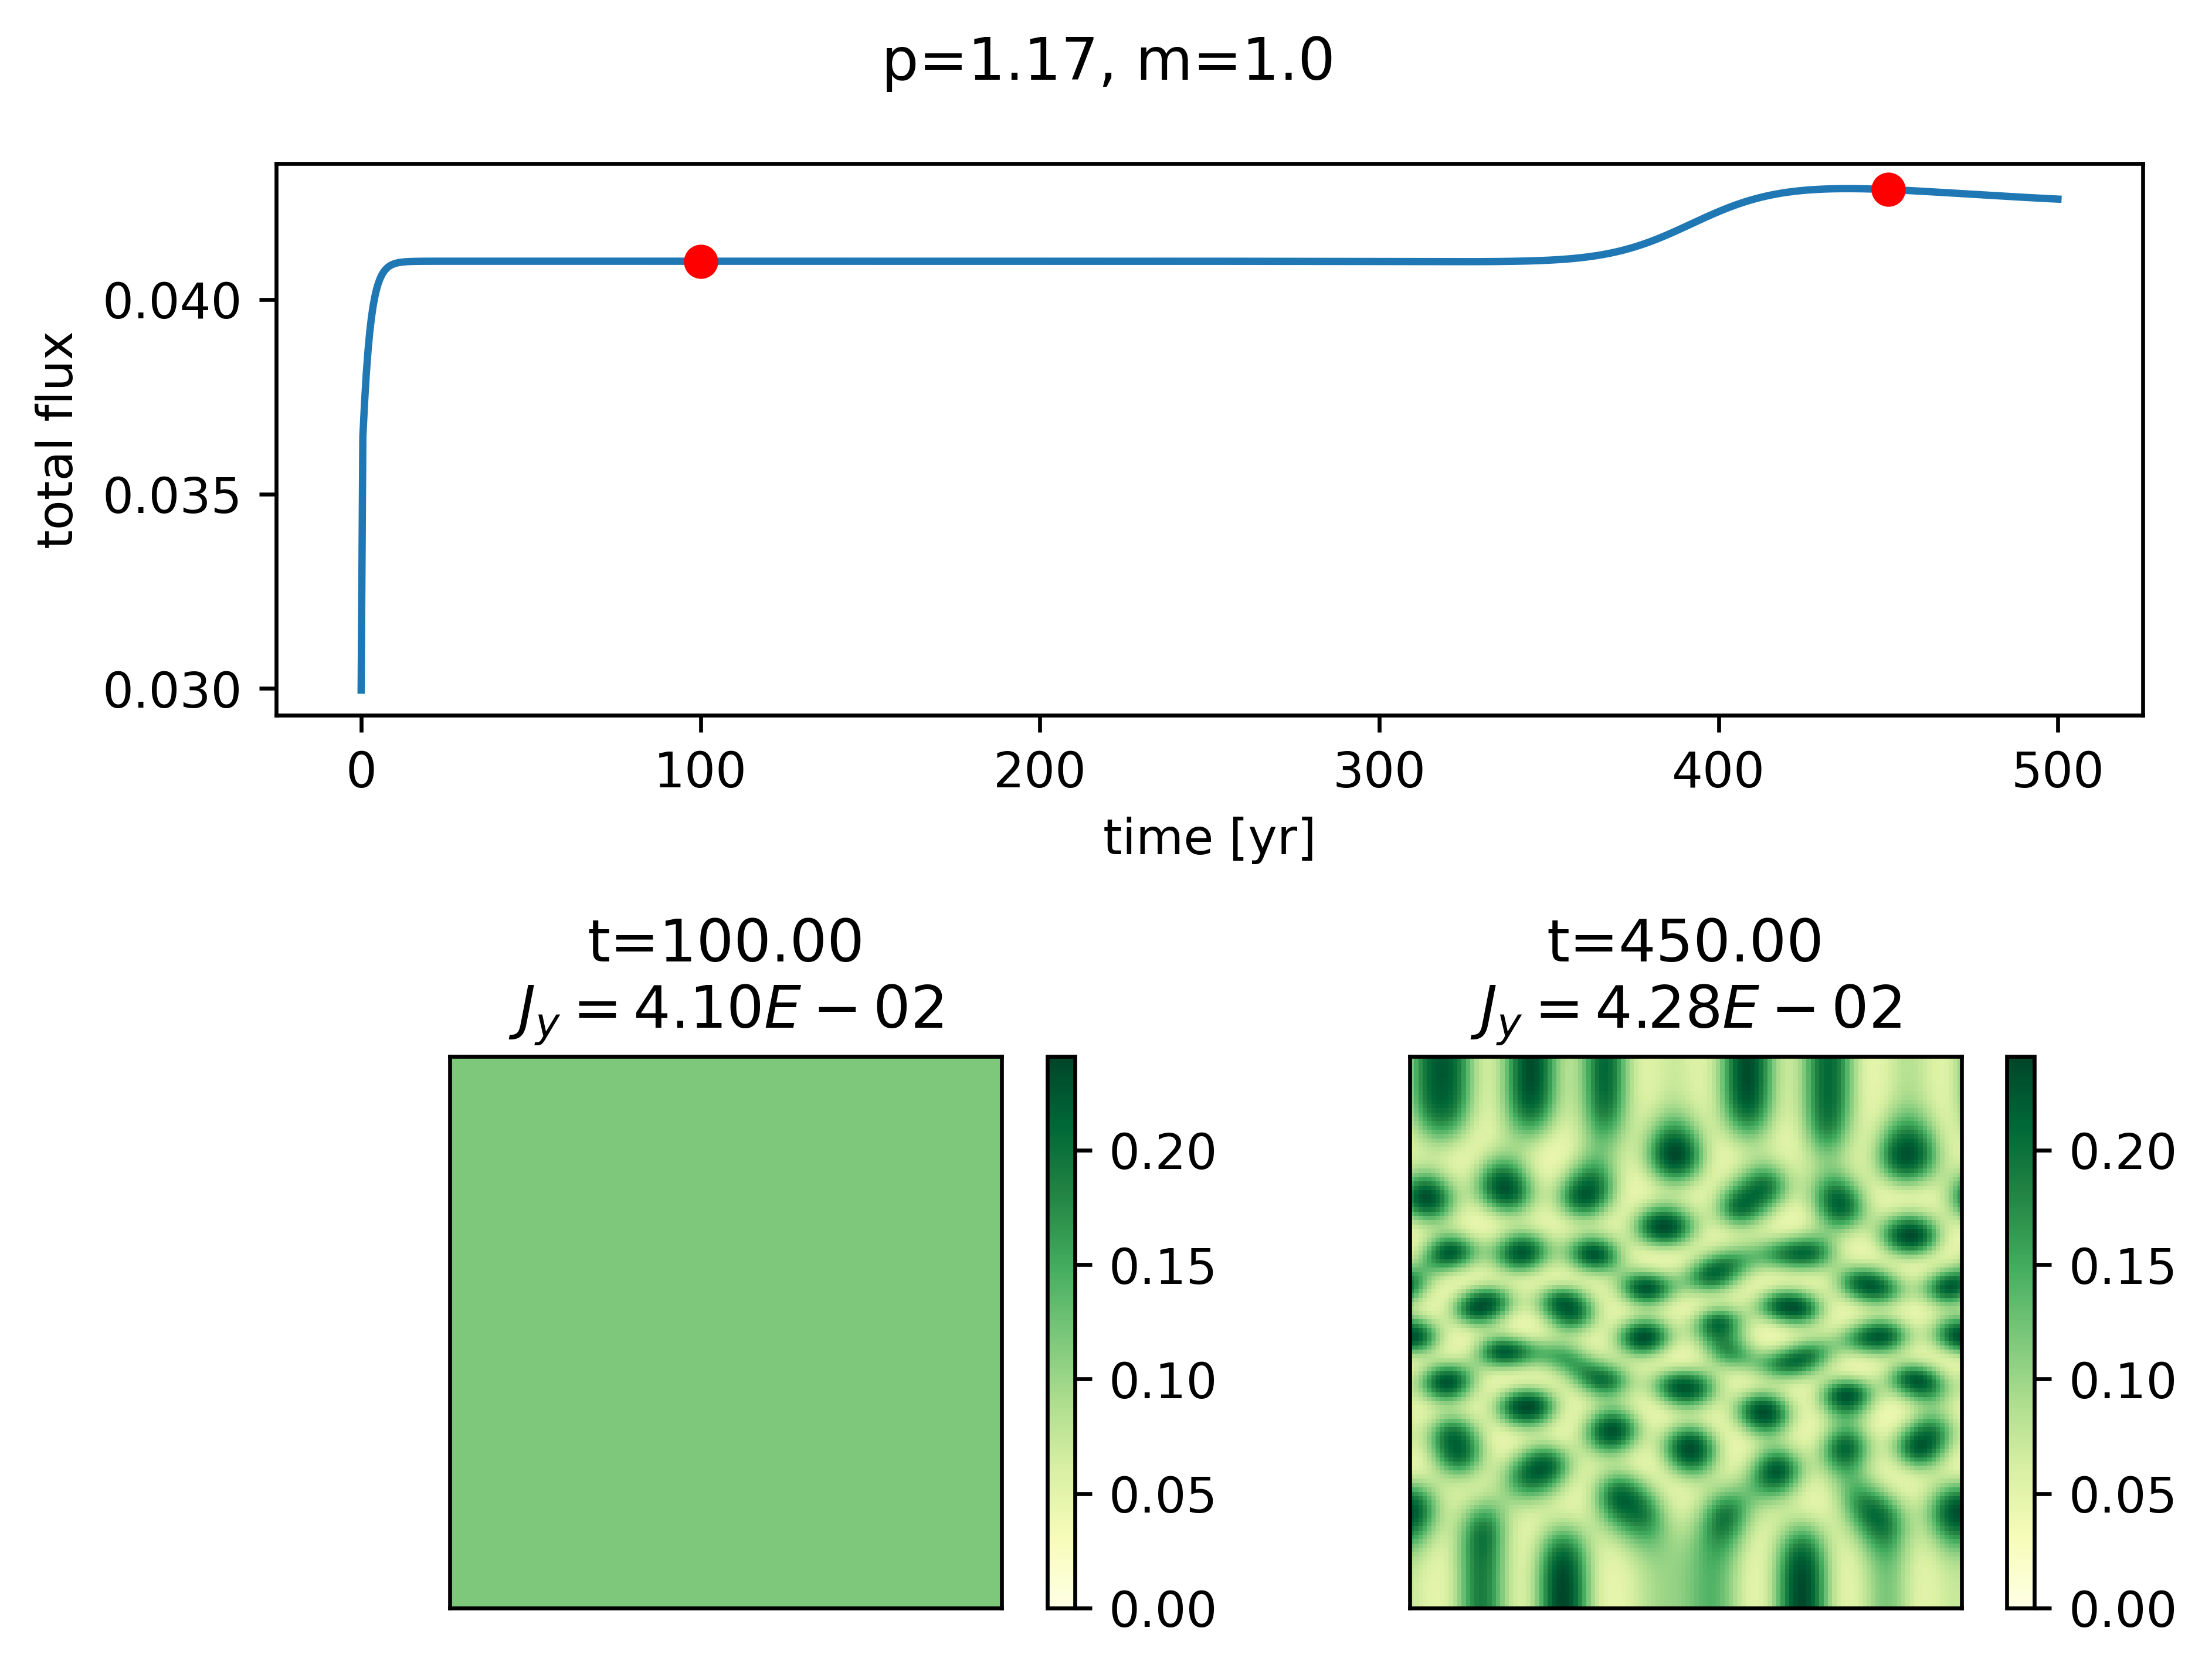

In [ ]:
plot_flux_highlights(1.17, 1.0, [200, 900])

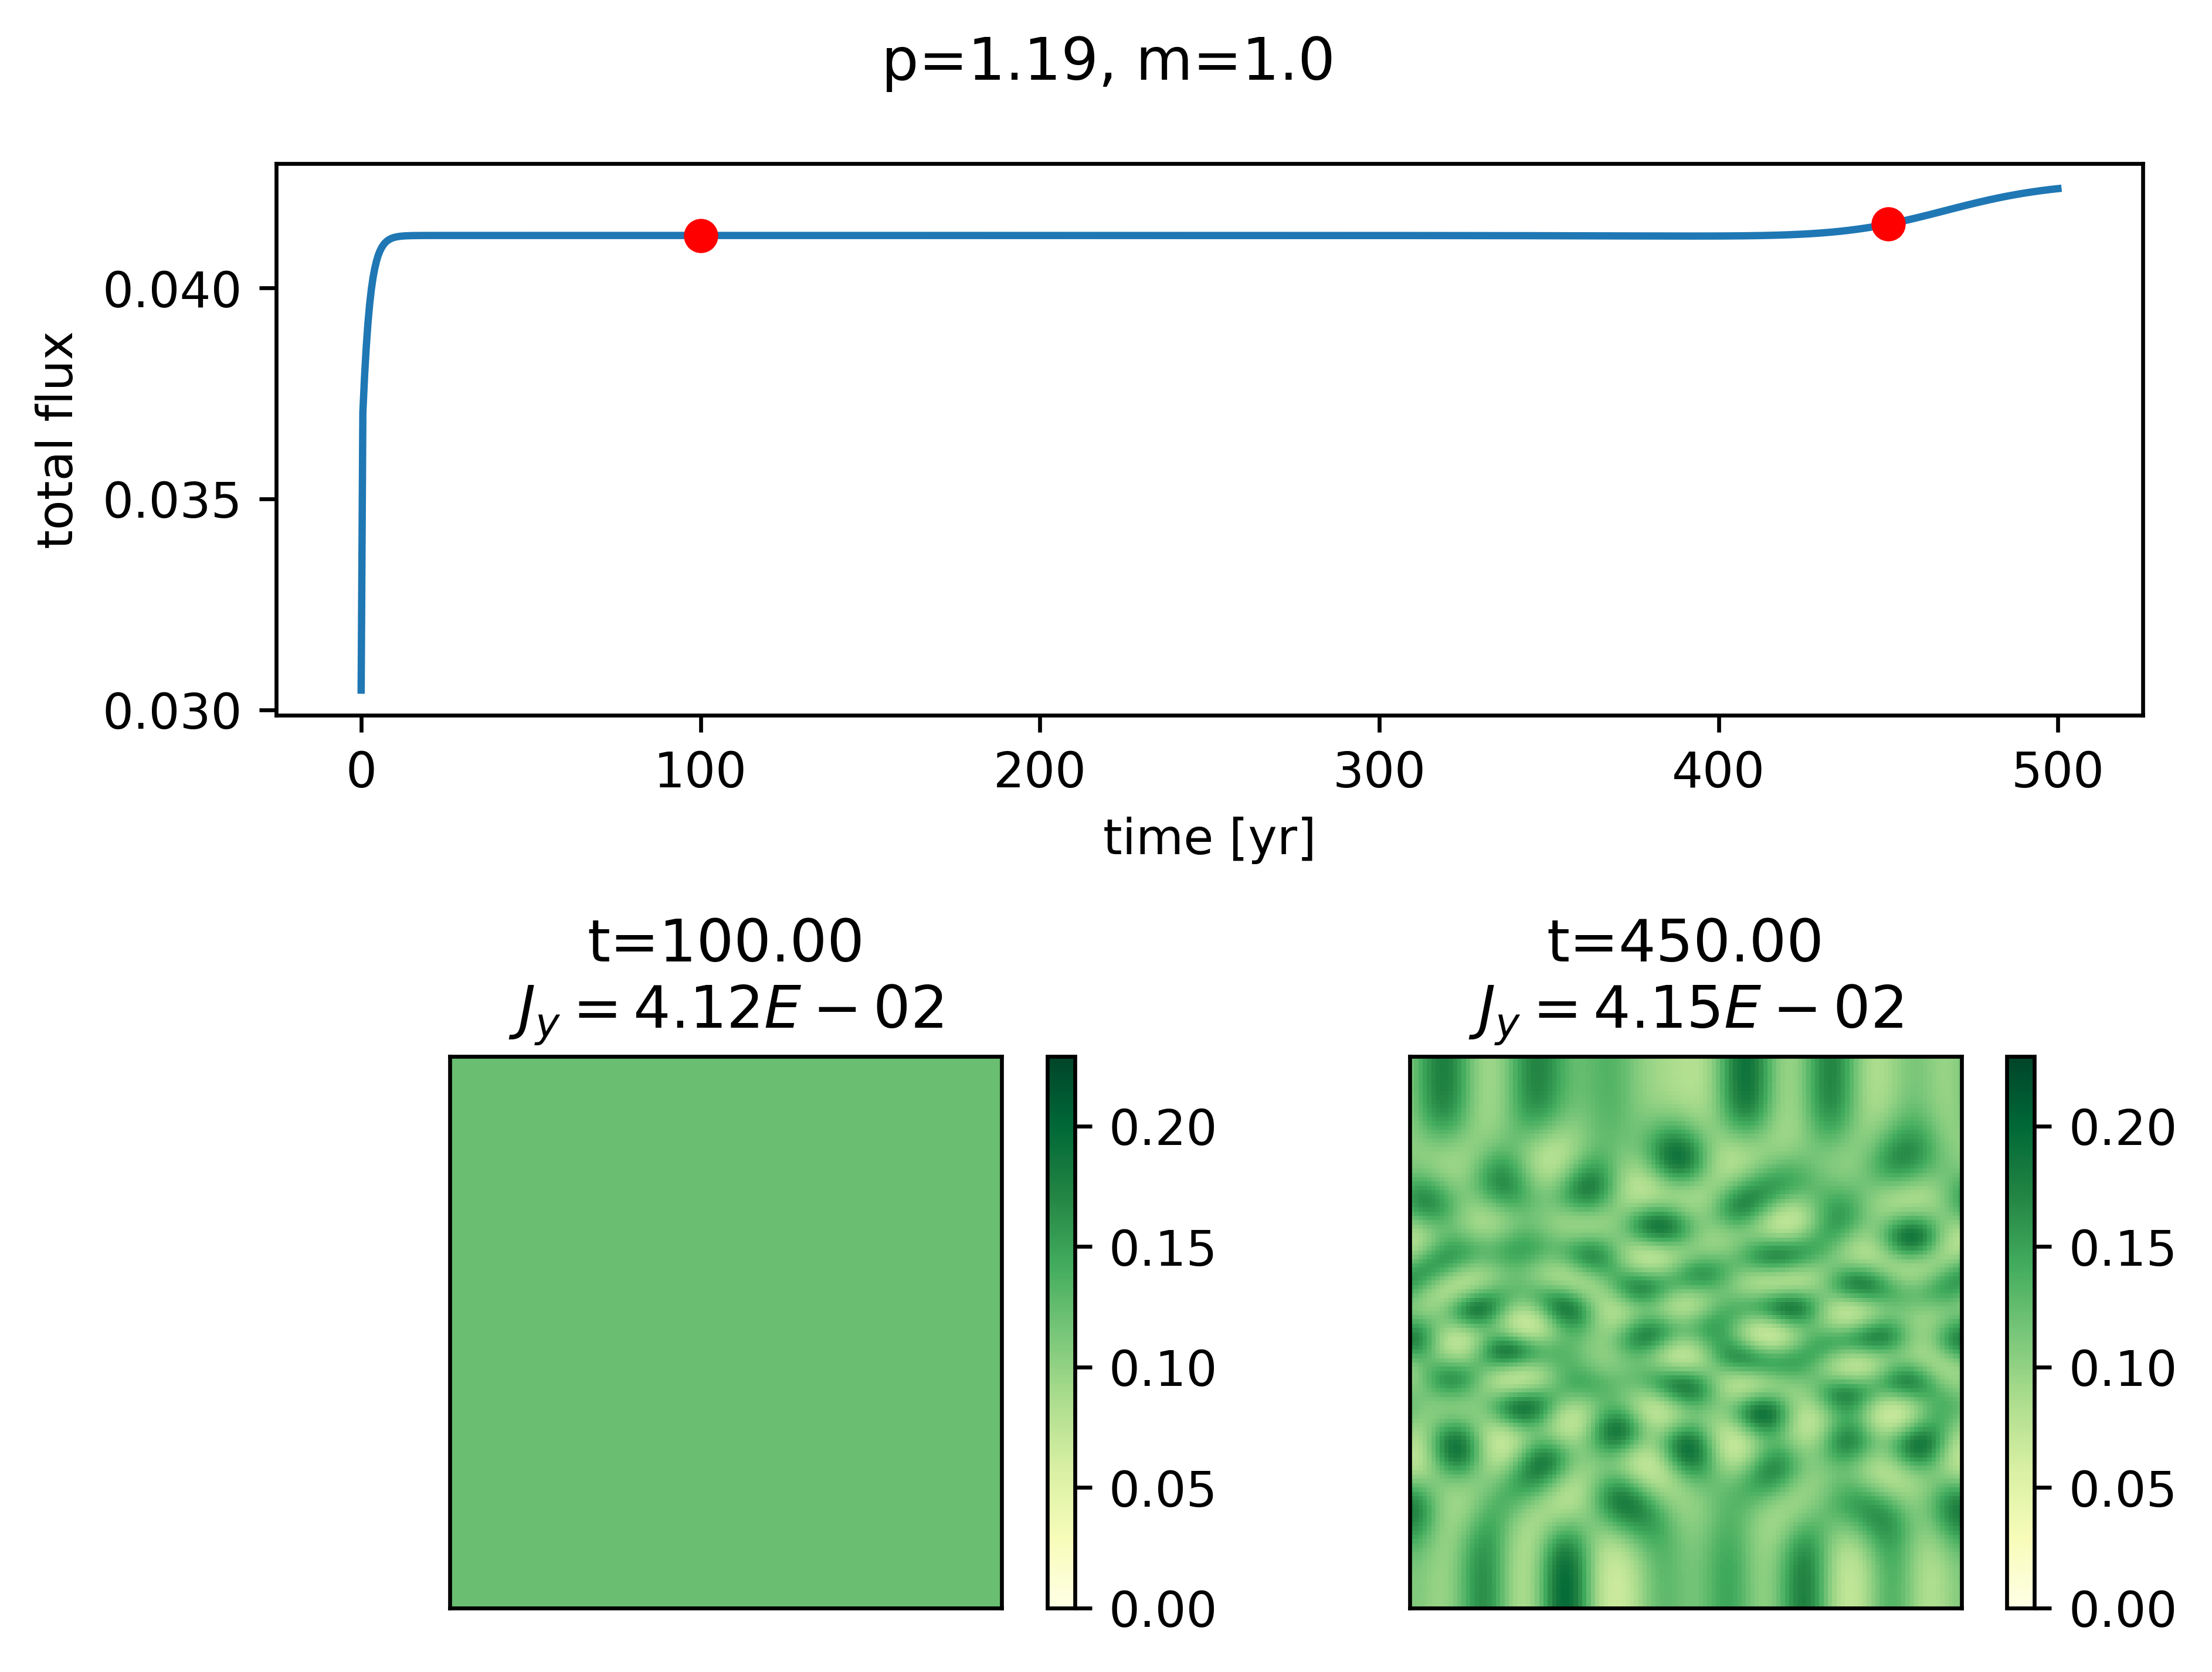

In [ ]:
plot_flux_highlights(1.19, 1.0, [200, 900])